# Classification example

## Import Data

In [1]:
import pandas as pd
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
dataset=pd.DataFrame(iris['data'],columns=iris['feature_names'])
dataset['target']=iris['target']

In [5]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Clean Data

In [6]:
# The data is already clean!

## Explore Data

In [7]:
import matplotlib.pyplot as plt

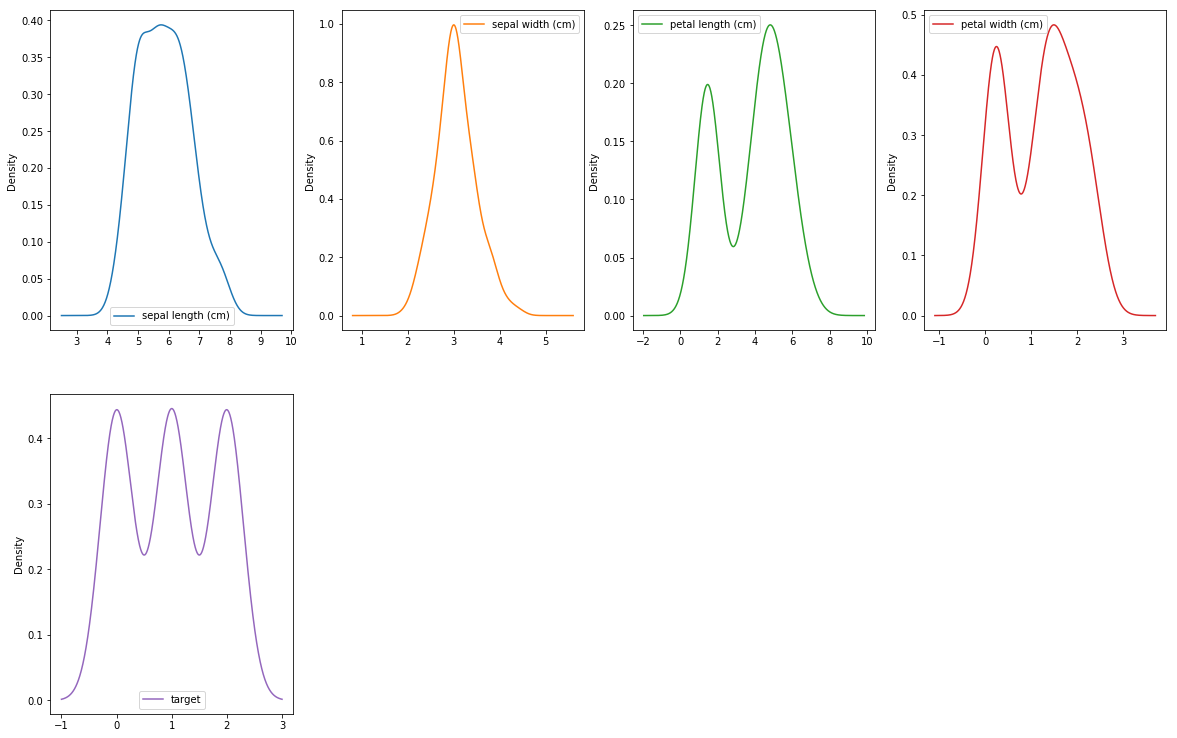

In [8]:
# each variable
dataset.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False,figsize=(20,20))
plt.show()

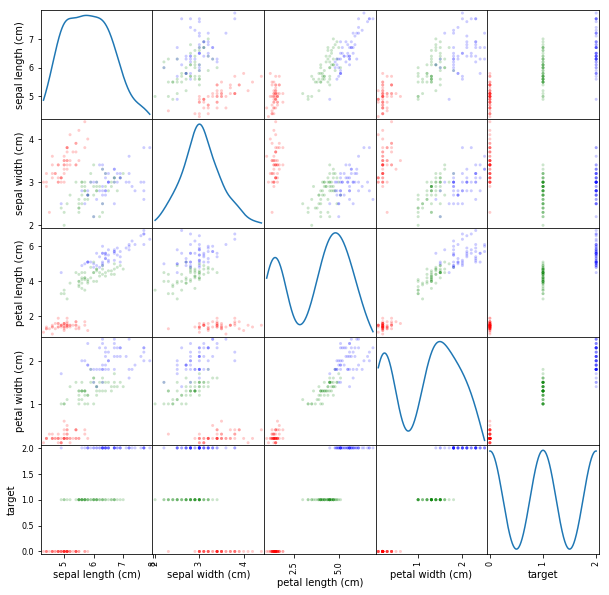

In [9]:
# correlations?
colors_palette = {0: "red", 1: "green", 2: "blue"}
colors = [colors_palette[c] for c in dataset['target']]
pd.plotting.scatter_matrix(dataset,alpha=0.2, figsize=(10, 10), diagonal='kde',c=colors)
plt.legend()
plt.show()

## Split Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
dataset.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [12]:
X=dataset[['sepal width (cm)', 'petal length (cm)']]
y=dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## Model training

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model = DecisionTreeClassifier(max_depth=2)

# Train the model using the training sets
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Test and Evaluate

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
# Make predictions using the testing set
y_predictions = model.predict(X_test)

# Metrics
print('Confusion matrix')
print(confusion_matrix(y_test, y_predictions))

print('\nclassification report')
print(classification_report(y_test, y_predictions))

Confusion matrix
[[6 0 0]
 [0 5 1]
 [0 0 3]]

classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       1.00      0.83      0.91         6
          2       0.75      1.00      0.86         3

avg / total       0.95      0.93      0.94        15



## Show results

In [17]:
import numpy as np
from matplotlib.colors import ListedColormap

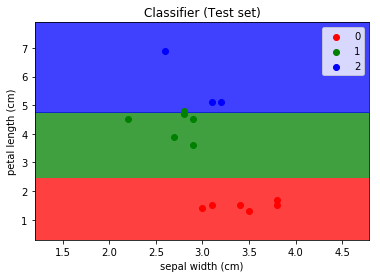

In [18]:
# Visualising the Test set results
X_set, y_set = X_test.values, y_test.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('sepal width (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.show()

## Exercise

1. Can you improve your score if you use more than two feature?
2. How would you implement crossvalidation? are we overfitting? search and try.
3. Can you use another model for this classification? try another one.